# Pymaceuticals Inc.
---

### Analysis

- Overall, mice treated with Ramicane had the smallest average tumor size and those treated with Ketapril had the largest.
- Capomulin was prescribed to the most amount of mice, while Propriva was prescribed to the least.
- Overall, there were slightly more males (51.0%) compared to females (49.0%).
- The final average tumor volume was lower in mice receiving either Capomulin or Ramicane compared to mice the received either Infubinol or Ceftamin
- For mice that received Capomulin, there was a relatively strong correlation (0.84) between their weight and tumor size.
 

# 0. Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
print(mouse_metadata.shape)

(249, 5)


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
print(study_results.shape)

(1893, 4)


### Join DFs

In [7]:
data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [9]:
data.nunique()
# a Mouse ID can have multiple enteries

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [10]:
print(data.shape)

(1893, 8)


# 1. Explore Data

### 1.1 Number of Mice

In [11]:
mice_count = data["Mouse ID"].nunique()
mice_count

249

### 1.2 Duplicate Mice Enteries

In [12]:
# resource: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
df_duplicates = data[data.duplicated(keep=False)]
df_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.0,0,Propriva,Female,21,26
861,g989,0,45.0,0,Propriva,Female,21,26


In [13]:
df_duplicate_mouse = data.loc[data["Mouse ID"] == 'g989',:]
df_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


### 1.3 Create Clean DF

In [14]:
clean_data = data.loc[data["Mouse ID"] != 'g989',:]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [15]:
print(clean_data.shape)

(1880, 8)


In [16]:
mice_count = clean_data["Mouse ID"].nunique()
mice_count

248

# 2. Summary Statistics

In [17]:
mean = clean_data.groupby("Drug Regimen").mean()
median = clean_data.groupby("Drug Regimen").median()
variance = clean_data.groupby("Drug Regimen").var()
std = clean_data.groupby("Drug Regimen").std()
sem = clean_data.groupby("Drug Regimen").sem()

In [18]:
tumor_summary_data = pd.DataFrame({"Mean Tumor Volume":mean["Tumor Volume (mm3)"],
                                   "Median Tumor Volume":median["Tumor Volume (mm3)"],
                                   "Tumor Volume Variance":variance["Tumor Volume (mm3)"],
                                   "Tumor Volume Std. Dev.":std["Tumor Volume (mm3)"],
                                   "Tumor Volume Std. Err.":sem["Tumor Volume (mm3)"]})
tumor_summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# 3. Bar and Pie Charts

### 3.1 Bar Chart

#### Pyplot

In [20]:
mice_tested = clean_data.groupby("Drug Regimen").count().reset_index()
mice_tested = mice_tested.sort_values("Mouse ID", ascending=False)
drugs = mice_tested["Drug Regimen"].unique()
mice_tested = mice_tested["Mouse ID"]

In [21]:
x_axis = np.arange(len(drugs))

Text(0, 0.5, 'Number of Mice Tested')

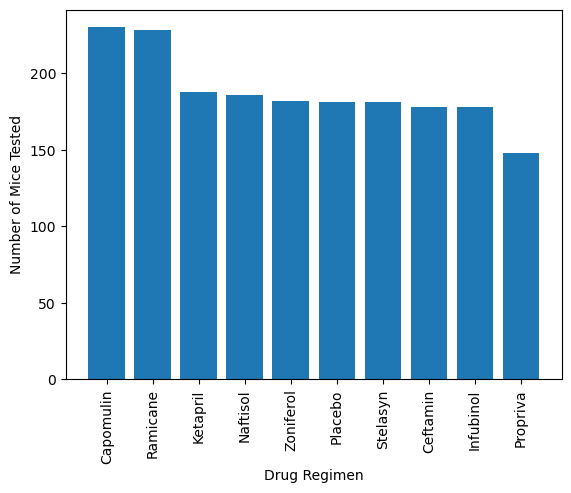

In [22]:
plt.bar(x_axis, mice_tested, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

#### Pandas

In [23]:
mice_by_drug = clean_data[["Drug Regimen", "Mouse ID"]]
drug_counts = mice_by_drug.groupby("Drug Regimen").count()
drug_counts = drug_counts.sort_values("Mouse ID", ascending=False)
drug_counts.head()

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182


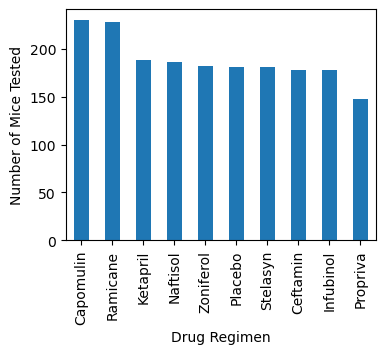

<Figure size 640x480 with 0 Axes>

In [24]:
drug_counts.plot(kind="bar", figsize=(4,3), legend=False)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

### 3.2 Pie Chart

#### Pandas

In [25]:
sex_data = clean_data[["Sex", "Mouse ID"]]
sex_counts = sex_data.groupby("Sex").count()
sex_counts = sex_counts.sort_values("Mouse ID", ascending=False)
sex_counts.head()

,Mouse ID
Sex,
Male,958
Female,922


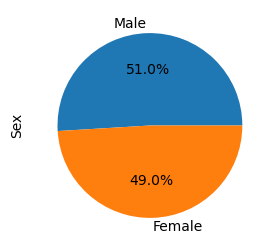

<Figure size 640x480 with 0 Axes>

In [26]:
sex_counts.plot(kind="pie", figsize=(4,3), legend=False, subplots=True, autopct="%1.1f%%")

plt.ylabel("Sex")

plt.show()
plt.tight_layout()

#### Pyplot

In [27]:
py_sex = clean_data.groupby("Sex").count()
py_sex = py_sex.sort_values("Mouse ID", ascending=False).reset_index()
py_sex.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Male,958,958,958,958,958,958,958
1,Female,922,922,922,922,922,922,922


In [28]:
sex = [py_sex["Sex"][x] for x in range(0, len(py_sex))]
counts = [py_sex["Mouse ID"][y] for y in range(0, len(py_sex))]
colors = ["blue","darkorange"]

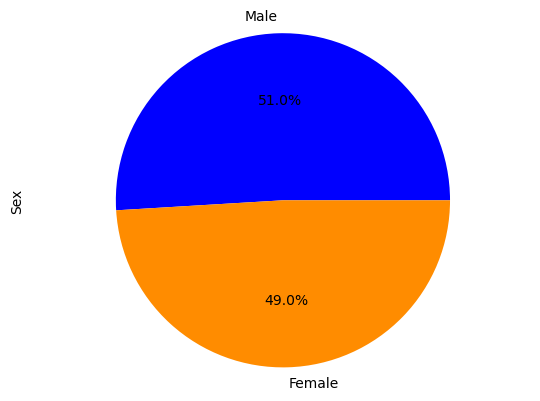

<Figure size 640x480 with 0 Axes>

In [29]:
plt.pie(counts, labels=sex, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")

plt.axis("equal")
plt.show()
plt.tight_layout()

# 4. Quartiles, Outliers and Boxplots

### 4.1 Final Tumor Volume

In [30]:
# source: https://stackoverflow.com/questions/22485375/efficiently-select-rows-that-match-one-of-several-values-in-pandas-dataframe
drugs_filtered = clean_data.loc[clean_data["Drug Regimen"].isin(['Capomulin','Ramicane','Infubinol','Ceftamin']), ["Mouse ID","Timepoint"]]
last_timepoint = drugs_filtered.groupby("Mouse ID").max().reset_index()
last_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45


In [31]:
print(last_timepoint.shape)

(100, 2)


In [32]:
final_volume = pd.merge(clean_data,last_timepoint,on=["Mouse ID","Timepoint"])
final_volume = final_volume[["Drug Regimen","Tumor Volume (mm3)"]]
final_volume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
1,Infubinol,36.321346
2,Infubinol,72.226731
3,Infubinol,46.250112
4,Infubinol,57.031862


In [33]:
print(final_volume.shape)

(100, 2)


### 4.2 IQR

In [34]:
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
volume = [final_volume["Tumor Volume (mm3)"][x] for x in range(0, len(last_timepoint))]

In [35]:
capomulin = final_volume.loc[final_volume["Drug Regimen"]=='Capomulin', "Tumor Volume (mm3)"].reset_index(drop=True)
ramicane = final_volume.loc[final_volume["Drug Regimen"]=='Ramicane', "Tumor Volume (mm3)"].reset_index(drop=True)
infubinol = final_volume.loc[final_volume["Drug Regimen"]=='Infubinol', "Tumor Volume (mm3)"].reset_index(drop=True)
ceftamin = final_volume.loc[final_volume["Drug Regimen"]=='Ceftamin', "Tumor Volume (mm3)"].reset_index(drop=True)

In [36]:
drugs_of_interest = pd.DataFrame({"Capomulin":capomulin, "Ramicane":ramicane,
                                  "Infubinol":infubinol,"Ceftamin":ceftamin})
drugs_of_interest.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.342008,36.321346,61.386660
1,38.753265,36.561652,72.226731,46.784535
2,32.377357,31.560470,46.250112,64.299830
3,23.343598,38.407618,57.031862,48.722078
4,38.939633,43.047543,67.685569,57.918381


In [37]:
for x in range(0, len(treatment)):
    values = drugs_of_interest.iloc[:,x]
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    drug = treatment[x]
    outliers = []
    for x in range(0, len(values)):
        if values[x] < lower_bound or values[x] > upper_bound:
            outliers.append(values[x])

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


### 4.3 Box Plot

Text(0, 0.5, 'Final Tumor Volume (mm3)')

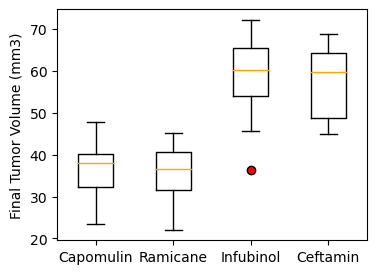

In [38]:
# change outlier color source: https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot
drugs_of_interest.plot(kind='box',color=dict(boxes='black', whiskers='black', medians='orange', caps='black'),grid=False,
                figsize=(4,3),flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")

# 5. Line and Scatter Plots

### 5.1 Line Graph

In [39]:
all_capomulin_mice = clean_data.loc[clean_data["Drug Regimen"]=='Capomulin', :]
all_capomulin_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [40]:
specified_capomulin_mice = all_capomulin_mice.loc[all_capomulin_mice["Mouse ID"] == 'b128',:]
specified_capomulin_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

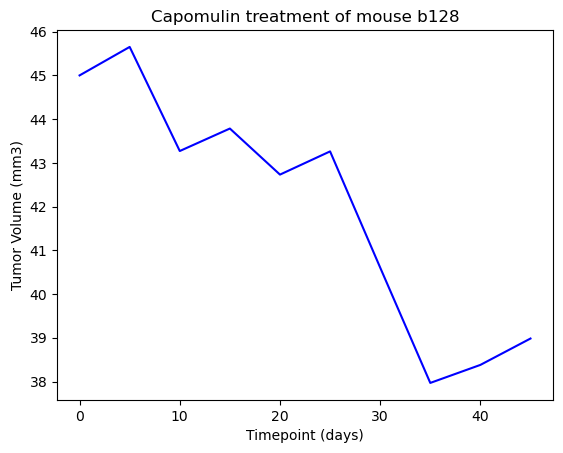

In [41]:
plt.plot(specified_capomulin_mice["Timepoint"], specified_capomulin_mice["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse b128")

### 5.2 Scatter Plot

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

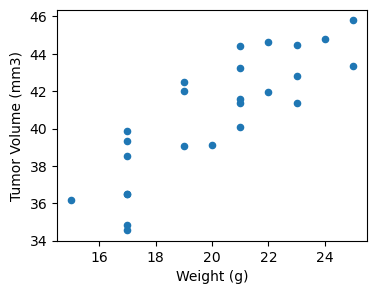

In [42]:
grouped_data = all_capomulin_mice.groupby(["Mouse ID","Weight (g)"]).mean().reset_index()
grouped_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(4,3))

# 6. Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


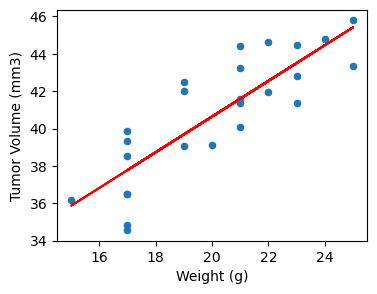

In [44]:
from scipy.stats import linregress
grouped_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(4,3))

x_values = grouped_data["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, grouped_data["Tumor Volume (mm3)"])
regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values,grouped_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")